In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#upload
from google.colab import files
uploaded = files.upload()

Saving genres_v2.csv to genres_v2.csv


In [3]:
# Load the dataset
data = pd.read_csv('/content/genres_v2.csv')

<ipython-input-3-7feb886f8a62>:2: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/content/genres_v2.csv')


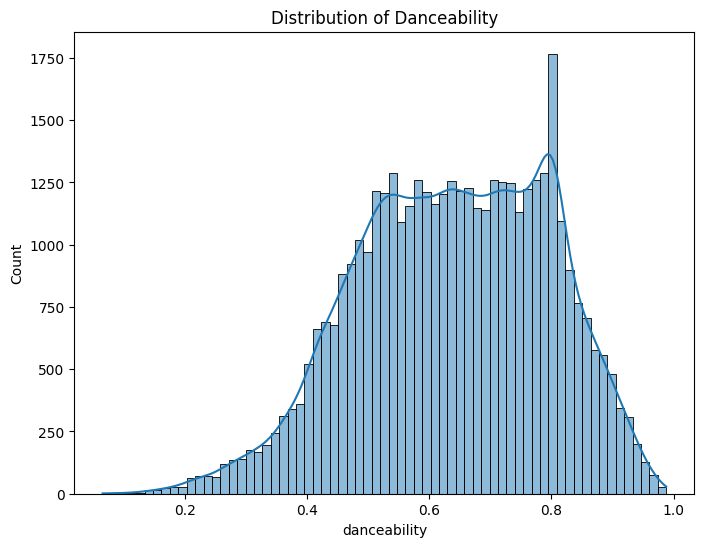

In [4]:
# 1. Distribution of Danceability
plt.figure(figsize=(8, 6))
sns.histplot(data['danceability'], kde=True)
plt.title('Distribution of Danceability')
plt.show()

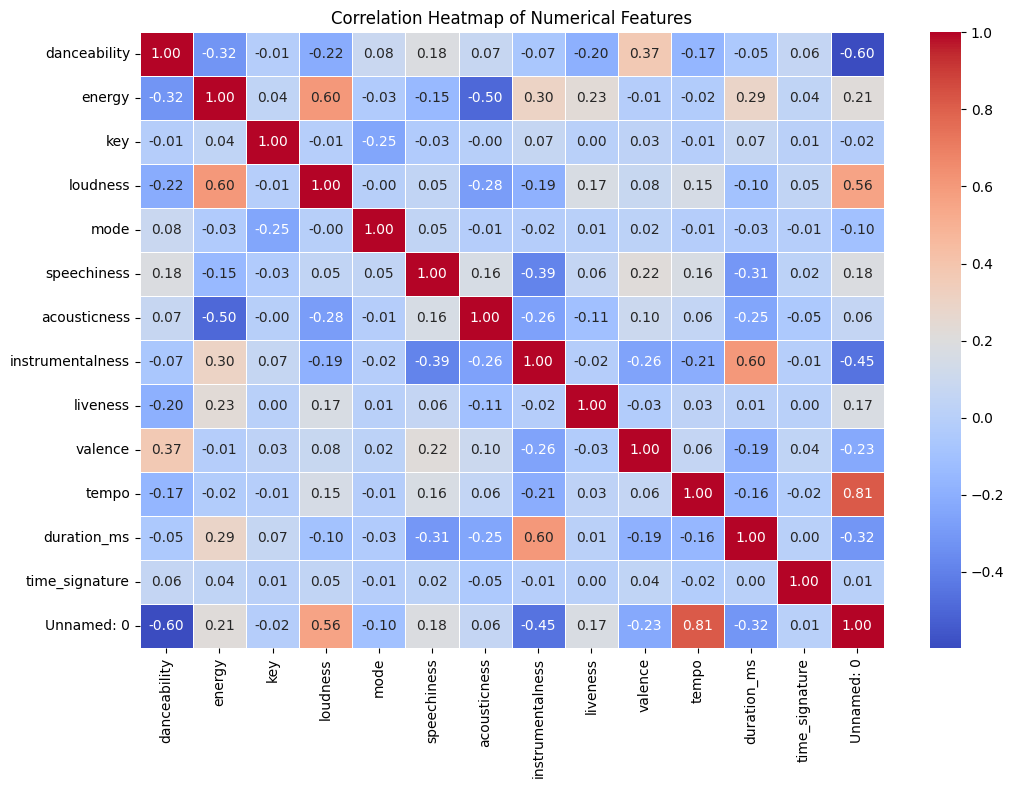

In [5]:
# Filter numerical columns only
numerical_data = data.select_dtypes(include=['float64', 'int64'])

# 2. Correlation Heatmap for Numerical Features
plt.figure(figsize=(12, 8))
correlation = numerical_data.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

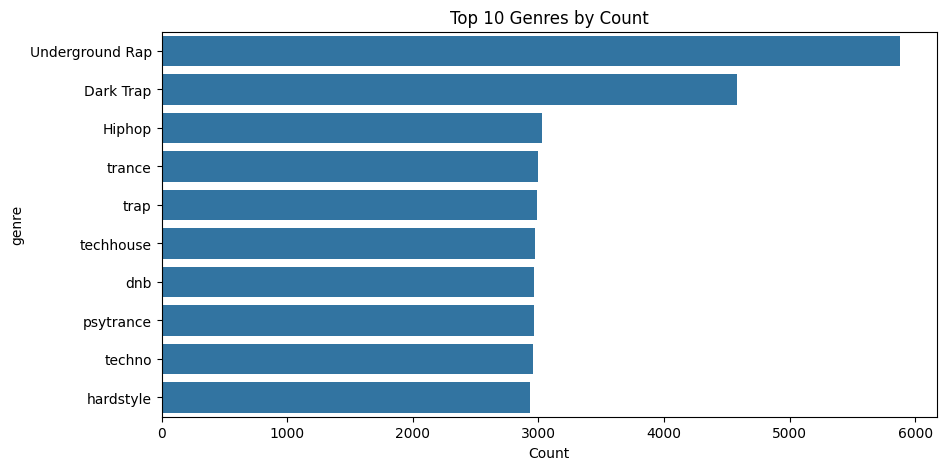

In [6]:
# 3. Genre Distribution (Top 10 Genres)
top_genres = data['genre'].value_counts().head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_genres.values, y=top_genres.index)
plt.title('Top 10 Genres by Count')
plt.xlabel('Count')
plt.show()

# Analysis of Visualizations and Insights from EDA
# Distribution of Danceability:

The histogram indicates that danceability values are slightly skewed towards the right, with a majority of songs scoring between 0.5 and 0.9. This suggests that most tracks in the dataset are relatively "danceable," which aligns with upbeat or rhythm-oriented genres such as EDM or hip-hop.
There is a noticeable spike close to 0.8 danceability, indicating that several songs are specifically crafted to have a high level of rhythmic appeal.
Correlation Heatmap:

Energy and Loudness show a positive correlation (0.60), which makes sense since louder tracks are often perceived as more energetic.
Instrumentalness has a positive correlation with tempo (0.60), meaning tracks with higher tempos tend to have fewer vocals, likely instrumental tracks like techno or trance.
Valence (a measure of the positivity conveyed by music) has a moderate positive correlation with danceability (0.37), meaning happier songs tend to be more danceable.
Unnamed: 0 seems to correlate with several features (like loudness and tempo), suggesting it might not be a useful feature and could be dropped during preprocessing.
Top 10 Genres:

Underground Rap and Dark Trap dominate the dataset, followed by Hip-hop and other electronic genres (e.g., trance, techno, psytrance). This indicates a heavy skew toward urban and electronic music styles.
The prominence of genres like techhouse, dnb (drum and bass), and hardstyle suggests that the dataset contains a large proportion of electronic dance music tracks, making it suitable for rhythm and energy-based analysis.
Next Steps
Based on the insights from the EDA, here are the suggested next steps for preprocessing:

# Feature Selection:

1) Drop irrelevant columns such as Unnamed: 0, type, id, uri, track_href, and analysis_url, as they do not add value for modeling purposes.
Focus on key features like danceability, energy, loudness, valence, tempo, genre, and instrumentalness for further analysis and model-building.
Handling Missing Data:

2) The song_name column contains many missing values, and since it is not critical for analysis, we can either drop it or fill the missing values with placeholders if required for some purpose.
Data Encoding:

3) Since the genre column contains categorical data, it will need to be encoded (e.g., using one-hot encoding or label encoding) for machine learning purposes.
Outlier Detection:

4) Outliers in loudness (very low values) and tempo (extremely low or high values) need to be detected and handled. We can either remove them or use clipping strategies.

# Scaling:
For features like tempo, loudness, and duration_ms, it is advisable to use scaling techniques (e.g., Min-Max Scaling or Standardization) to bring them to a similar range.

In [7]:
# Import necessary libraries for the nwxt step
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder

#Drop Irrelevant Columns
columns_to_drop = ['Unnamed: 0', 'type', 'id', 'uri', 'track_href', 'analysis_url', 'song_name', 'title']
data_cleaned = data.drop(columns=columns_to_drop)

In [8]:
# Data Encoding (One-Hot Encoding for 'genre')
encoder = OneHotEncoder(sparse_output=False)
encoded_genres = encoder.fit_transform(data_cleaned[['genre']])

In [9]:
# Convert the encoded genres into a DataFrame
encoded_genres_df = pd.DataFrame(encoded_genres, columns=encoder.get_feature_names_out(['genre']))
# Merge encoded genres with the cleaned dataset
data_encoded = pd.concat([data_cleaned.drop('genre', axis=1), encoded_genres_df], axis=1)

# Outlier Detection and Handling (Capping Outliers)
# Capping outliers using 1st and 99th percentiles for 'loudness' and 'tempo'
loudness_cap = np.percentile(data_encoded['loudness'], [1, 99])
tempo_cap = np.percentile(data_encoded['tempo'], [1, 99])

# Apply the capping
data_encoded['loudness'] = np.clip(data_encoded['loudness'], loudness_cap[0], loudness_cap[1])
data_encoded['tempo'] = np.clip(data_encoded['tempo'], tempo_cap[0], tempo_cap[1])

In [10]:
# Feature Scaling (Standardization)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data_encoded[['tempo', 'loudness', 'duration_ms']])
# Convert scaled features to a DataFrame
scaled_features_df = pd.DataFrame(scaled_features, columns=['tempo_scaled', 'loudness_scaled', 'duration_scaled'])

In [11]:
# Merge scaled features back with the dataset
data_final = pd.concat([data_encoded.drop(['tempo', 'loudness', 'duration_ms'], axis=1), scaled_features_df], axis=1)

In [12]:
# Display the final preprocessed dataset
print("Preprocessed Dataset Overview:")
print(data_final.head())

Preprocessed Dataset Overview:
   danceability  energy  key  mode  speechiness  acousticness  \
0         0.831   0.814    2     1       0.4200        0.0598   
1         0.719   0.493    8     1       0.0794        0.4010   
2         0.850   0.893    5     1       0.0623        0.0138   
3         0.476   0.781    0     1       0.1030        0.0237   
4         0.798   0.624    2     1       0.2930        0.2170   

   instrumentalness  liveness  valence  time_signature  ...  genre_dnb  \
0          0.013400    0.0556   0.3890               4  ...        0.0   
1          0.000000    0.1180   0.1240               4  ...        0.0   
2          0.000004    0.3720   0.0391               4  ...        0.0   
3          0.000000    0.1140   0.1750               3  ...        0.0   
4          0.000000    0.1660   0.5910               4  ...        0.0   

   genre_hardstyle  genre_psytrance  genre_techhouse  genre_techno  \
0              0.0              0.0              0.0           

In [13]:
# Save the cleaned dataset to a CSV file (optional)
data_final.to_csv('/content/preprocessed_genres.csv', index=False)

In [14]:
print("Data Preprocessing Completed. The cleaned dataset is ready for further analysis.")

Data Preprocessing Completed. The cleaned dataset is ready for further analysis.


In [15]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import VarianceThreshold

In [16]:
# Load the preprocessed dataset
data = pd.read_csv('/content/preprocessed_genres.csv')

# Step 1: Data Imputation (if any missing values are present)
print("Checking for missing values...")
print(data.isnull().sum())

Checking for missing values...
danceability             0
energy                   0
key                      0
mode                     0
speechiness              0
acousticness             0
instrumentalness         0
liveness                 0
valence                  0
time_signature           0
genre_Dark Trap          0
genre_Emo                0
genre_Hiphop             0
genre_Pop                0
genre_Rap                0
genre_RnB                0
genre_Trap Metal         0
genre_Underground Rap    0
genre_dnb                0
genre_hardstyle          0
genre_psytrance          0
genre_techhouse          0
genre_techno             0
genre_trance             0
genre_trap               0
tempo_scaled             0
loudness_scaled          0
duration_scaled          0
dtype: int64


In [17]:
# Step 2: Clustering for Anomaly Detection
# Apply K-Means clustering with 5 clusters
kmeans = KMeans(n_clusters=5, random_state=42)

# Fit the KMeans model using the original dataset
clusters = kmeans.fit_predict(data)

# Add cluster labels to the dataset AFTER transformation
data_with_clusters = data.copy()
data_with_clusters['Cluster'] = clusters

# Calculate the distance of each point to its assigned cluster center
data_with_clusters['Distance_to_Center'] = np.min(
    kmeans.transform(data), axis=1  # Use original data without 'Cluster' column
)

# Identify and remove anomalies using the 95th percentile distance
threshold = np.percentile(data_with_clusters['Distance_to_Center'], 95)
data_no_anomalies = data_with_clusters[data_with_clusters['Distance_to_Center'] <= threshold]

print(f"Removed {len(data_with_clusters) - len(data_no_anomalies)} anomalies.")

# Drop temporary columns used for clustering
data_no_anomalies = data_no_anomalies.drop(['Cluster', 'Distance_to_Center'], axis=1)

Removed 2116 anomalies.


#visualizing the clustering result

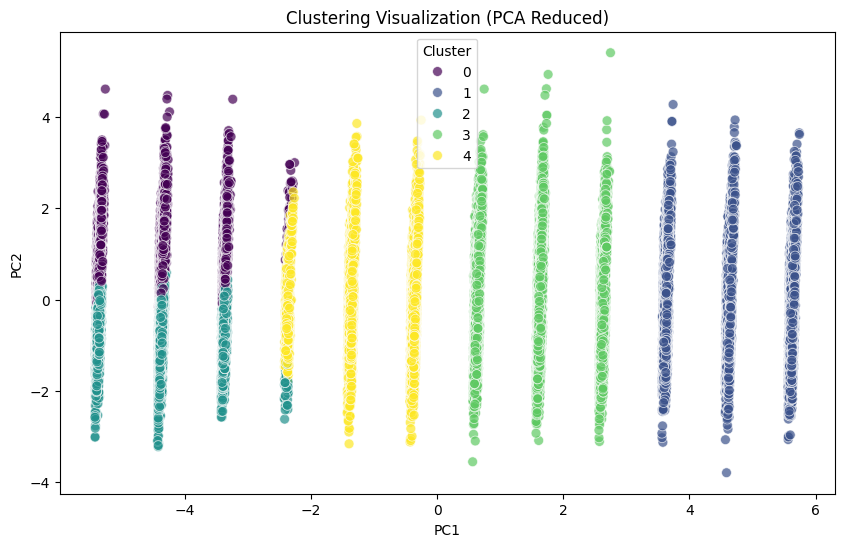

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


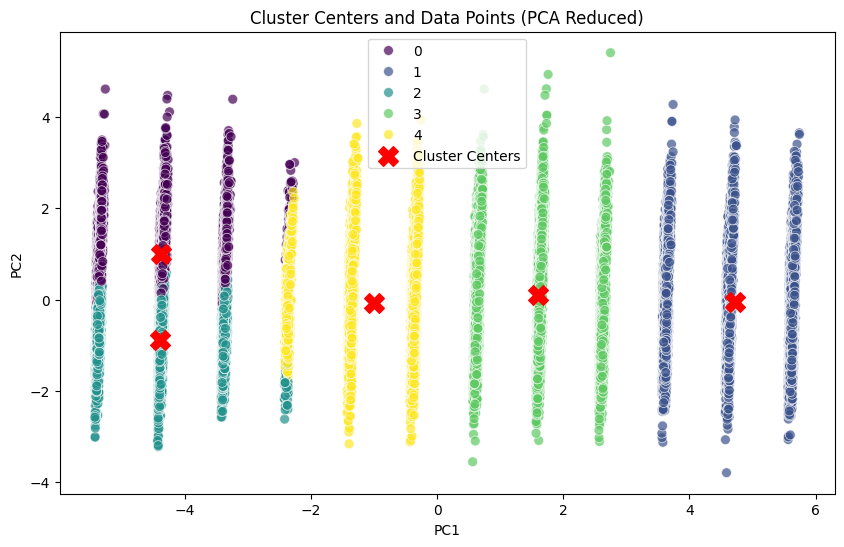

In [18]:
# Import necessary libraries
from sklearn.decomposition import PCA

# Step 1: Fit K-Means and Reduce the Data to 2 Dimensions using PCA
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(data)  # Fit KMeans on the original data

# Reduce the data to 2 dimensions for visualization using PCA
pca = PCA(n_components=2)
data_2d = pca.fit_transform(data)

# Create a DataFrame with the 2D data and cluster labels
clustered_data = pd.DataFrame(data_2d, columns=['PC1', 'PC2'])
clustered_data['Cluster'] = clusters

# Step 2: Plot the Clustering Results
plt.figure(figsize=(10, 6))
sns.scatterplot(data=clustered_data, x='PC1', y='PC2', hue='Cluster', palette='viridis', s=50, alpha=0.7)
plt.title('Clustering Visualization (PCA Reduced)')
plt.show()

# Step 3: Plot Cluster Centers (Optional)
cluster_centers_2d = pca.transform(kmeans.cluster_centers_)

plt.figure(figsize=(10, 6))
sns.scatterplot(data=clustered_data, x='PC1', y='PC2', hue='Cluster', palette='viridis', s=50, alpha=0.7)
plt.scatter(cluster_centers_2d[:, 0], cluster_centers_2d[:, 1], s=200, c='red', marker='X', label='Cluster Centers')
plt.title('Cluster Centers and Data Points (PCA Reduced)')
plt.legend()
plt.show()


#Building an AutoML Model Using AutoVIML

Installing AutoVIML in **Colab**

In [19]:
!pip install autoviml
!pip uninstall scipy -y
!pip install scipy==1.7.3
!pip uninstall numpy scipy autoviml -y
!pip uninstall numpy matplotlib scipy -y
!pip install numpy==1.22.4 matplotlib==3.5.3 scipy==1.7.3
!pip install numpy==1.23.5 scipy==1.9.3
!pip install autoviml==0.1.800

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.4/41.4 kB 2.2 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of imbalanced-ensemble to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.0/40.0 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.6/134.6 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 746.5/746.5 kB 20.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 73.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 69.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 87.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 255.9/255.9 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 586.9/586.9 kB 32.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/1

Found existing installation: scipy 1.13.1
Uninstalling scipy-1.13.1:
  Successfully uninstalled scipy-1.13.1
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 20.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 86.9 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albucore 0.0.16 requires numpy>=1.24, but you have numpy 1.22.4 which is incompatible.
albumentations 1.4.15 requires numpy>=1.24.4, but you have numpy 1.22.4 which is incompatible.
albumentations 1.4.15 requires scipy>=1.10.0, but you have scipy 1.7.3 which is incompatible.
arviz 0.19.0 requires numpy>=1.23.0, but you have numpy 1.22.4 which is incompatible.
arviz 0.19.0 requires scipy>=1.9.0, but you h

Found existing installation: numpy 1.22.4
Uninstalling numpy-1.22.4:
  Successfully uninstalled numpy-1.22.4
Found existing installation: scipy 1.7.3
Uninstalling scipy-1.7.3:
  Successfully uninstalled scipy-1.7.3
Found existing installation: autoviml 0.1.800
Uninstalling autoviml-0.1.800:
  Successfully uninstalled autoviml-0.1.800
Found existing installation: matplotlib 3.9.2
Uninstalling matplotlib-3.9.2:
  Successfully uninstalled matplotlib-3.9.2
  Using cached numpy-1.22.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (2.0 kB)
  Using cached scipy-1.7.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (2.2 kB)
Using cached numpy-1.22.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.8 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.9/11.9 MB 80.8 MB/s eta 0:00:00
Using cached scipy-1.7.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (39.9 MB)
ERROR: pip's dependency resolver does not currently take into acco

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.4/58.4 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 75.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.7/33.7 MB 13.4 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.4
    Uninstalling numpy-1.22.4:
      Successfully uninstalled numpy-1.22.4
  Attempting uninstall: scipy
    Found existing installation: scipy 1.7.3
    Uninstalling scipy-1.7.3:
      Successfully uninstalled scipy-1.7.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albucore 0.0.16 requires numpy>=1.24, but you have numpy 1.23.5 which is incompatible.
albumentations 1.4.15 requires numpy>=1.24.4, but you have numpy 1.23.5 which is incompatible.
albumentations 1.4.15 requires scipy>=1.10.0, but you have scipy 1.9.3 which is incompatible.
bigframes 1.

  Using cached autoviml-0.1.800-py3-none-any.whl.metadata (13 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 kB 2.6 MB/s eta 0:00:00
  Using cached matplotlib-3.9.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (11 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.8 MB/s eta 0:00:00
Using cached autoviml-0.1.800-py3-none-any.whl (134 kB)
Using cached matplotlib-3.9.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (8.3 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 57.1 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.5.3
    Uninstalling matplotlib-3.5.3:
      Successfully uninstalled matplotlib-3.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This be

Step 2: Import Required Libraries
Explanation: This code imports essential libraries for working with AutoVIML.

In [1]:
import pandas as pd
from autoviml.Auto_ViML import Auto_ViML

Imported Auto_ViML version: 0.1.800. Call using:
             m, feats, trainm, testm = Auto_ViML(train, target, test,
                            sample_submission='',
                            scoring_parameter='', KMeans_Featurizer=False,
                            hyper_param='RS',feature_reduction=True,
                             Boosting_Flag='CatBoost', Binning_Flag=False,
                            Add_Poly=0, Stacking_Flag=False,Imbalanced_Flag=False,
                            GPU_flag=False, verbose=1)
            

Imported Auto_NLP version: 0.1.01.. Call using:
     train_nlp, test_nlp, nlp_pipeline, predictions = Auto_NLP(
                nlp_column, train, test, target, score_type='balanced_accuracy',
                modeltype='Classification',top_num_features=200, verbose=0,
                build_model=True)


Step 3: Prepare the Dataset for AutoVIML
Explanation: This code loads the preprocessed dataset and prepares it for training.

In [2]:
# Load the preprocessed dataset
data = pd.read_csv('/content/preprocessed_genres.csv')

# Define target and feature columns (adjust 'target_column' as needed)
target_column = 'genre_trap'  # Example target column (you can change it)
X = data.drop(columns=[target_column])
y = data[target_column]

Step 4: Split the Data into Train and Test Sets
Explanation: Splitting the data into training and testing sets to evaluate the model’s performance.

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Combine X_train and y_train into train_data for AutoVIML
train_data = X_train.copy()
train_data[target_column] = y_train

Step 5: Build and Train the Model Using AutoVIML
Explanation: This code initializes the AutoVIML model and trains it.

##############  D A T A   S E T  A N A L Y S I S  #######################
ALERT! Changing hyperparameter search to RS. Otherwise, Random Forests will take too long for 10,000+ rows
Training Set Shape = (33844, 28)
    Training Set Memory Usage = 7.49 MB
Test Set Shape = (8461, 27)
    Test Set Memory Usage = 1.81 MB
Single_Label Target: ['genre_trap']

################ Binary_Classification VISUALIZATION Started #####################
Random shuffling the data set before training
    Using RandomizedSearchCV for Hyper Parameter Tuning. This is 3X faster than GridSearchCV...
       Class  -> Counts -> Percent
         0.0:   31439  ->   92.9%
         1.0:    2405  ->    7.1%
    Target genre_trap is already numeric. No transformation done.
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
###########################################################################

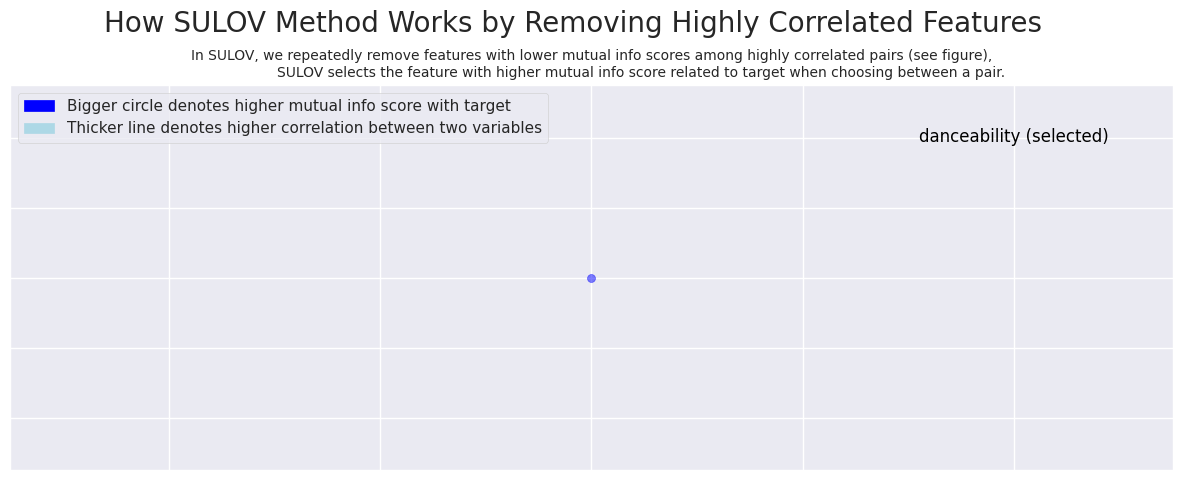

Splitting selected features into float and categorical (integer) variables:
    (10) float variables ...
    (17) categorical vars...
###############################################################################
#######     F E A T U R E   S E L E C T I O N    BY   X G B O O S T    ########
###############################################################################
Current number of predictors = 27 
    Finding Important Features using Boosted Trees algorithm...
        using 27 variables...
        using 22 variables...
        using 17 variables...
        using 12 variables...
        using 7 variables...
        using 2 variables...
Found 21 important features
    Performing limited feature engineering for binning, add_poly and KMeans_Featurizer flags  ...
    Train CV Split completed with TRAIN rows =  27075 , CV rows =  6769
    Binning_Flag set to False or there are no float vars in data set to be binned
    KMeans_Featurizer set to False or there are no float variables in

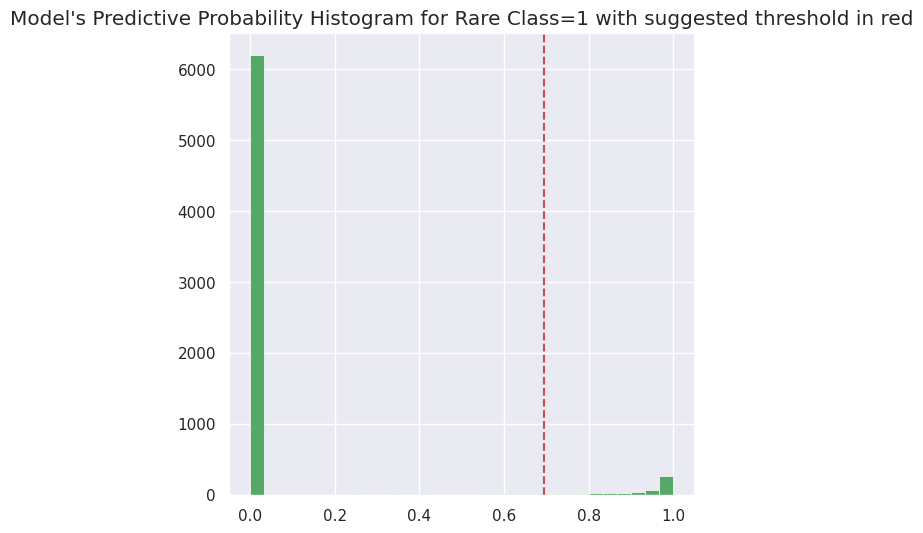

    Using threshold=0.5. However, 0.695 provides better F1=0.96 for rare class...
########################################################
Linear Model Prediction Results on Held Out CV Data Set:
    Regular Accuracy Score = 99.5%
Balanced Accuracy = 98.92% with Threshold = 0.50
Confusion Matrix:
[[6244   44]
 [   7  474]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      6288
           1       0.92      0.99      0.95       481

    accuracy                           0.99      6769
   macro avg       0.96      0.99      0.97      6769
weighted avg       0.99      0.99      0.99      6769

Balanced Accuracy = 97.41% with Threshold = 0.70
Confusion Matrix:
[[6276   12]
 [  24  457]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6288
           1       0.97      0.95      0.96       481

    accuracy                           0.99      6769
   macro avg       0.99      0.97   

After multiple models, Ensemble Model Results:
Binary Class Model Metrics Report
#####################################################
    Accuracy          = 99.5%
    Balanced Accuracy = 97.3%
    Precision         = 97.4%
    Average Precision = 98.5%
    Recall            = 94.8%
    F1 Score          = 96.1%
#####################################################
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6288
           1       0.97      0.95      0.96       481

    accuracy                           0.99      6769
   macro avg       0.99      0.97      0.98      6769
weighted avg       0.99      0.99      0.99      6769

[[6276   12]
 [  25  456]]
#############################################################################
Single Model is better than Ensembling Models for this data set.
Could not plot Cross Validation Parameters
    Time taken for this Target (in seconds) = 87
    Binning_Flag set to False or there are

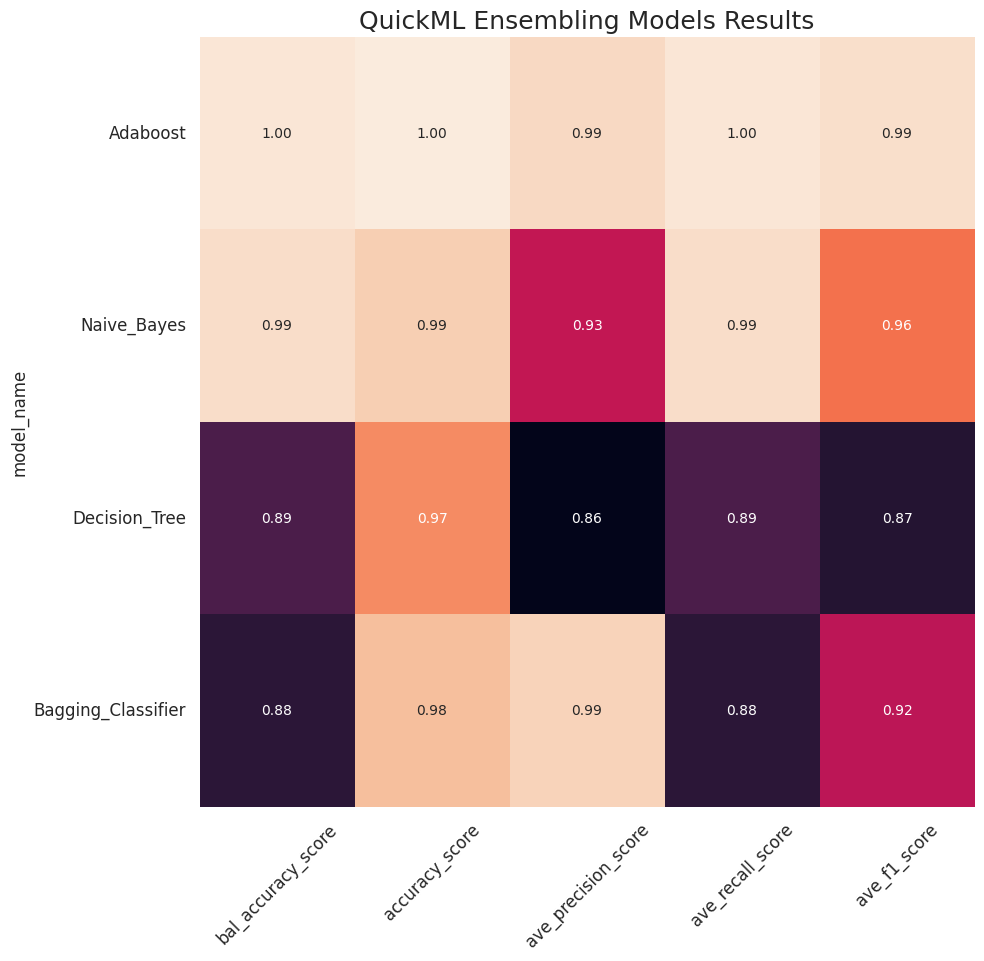

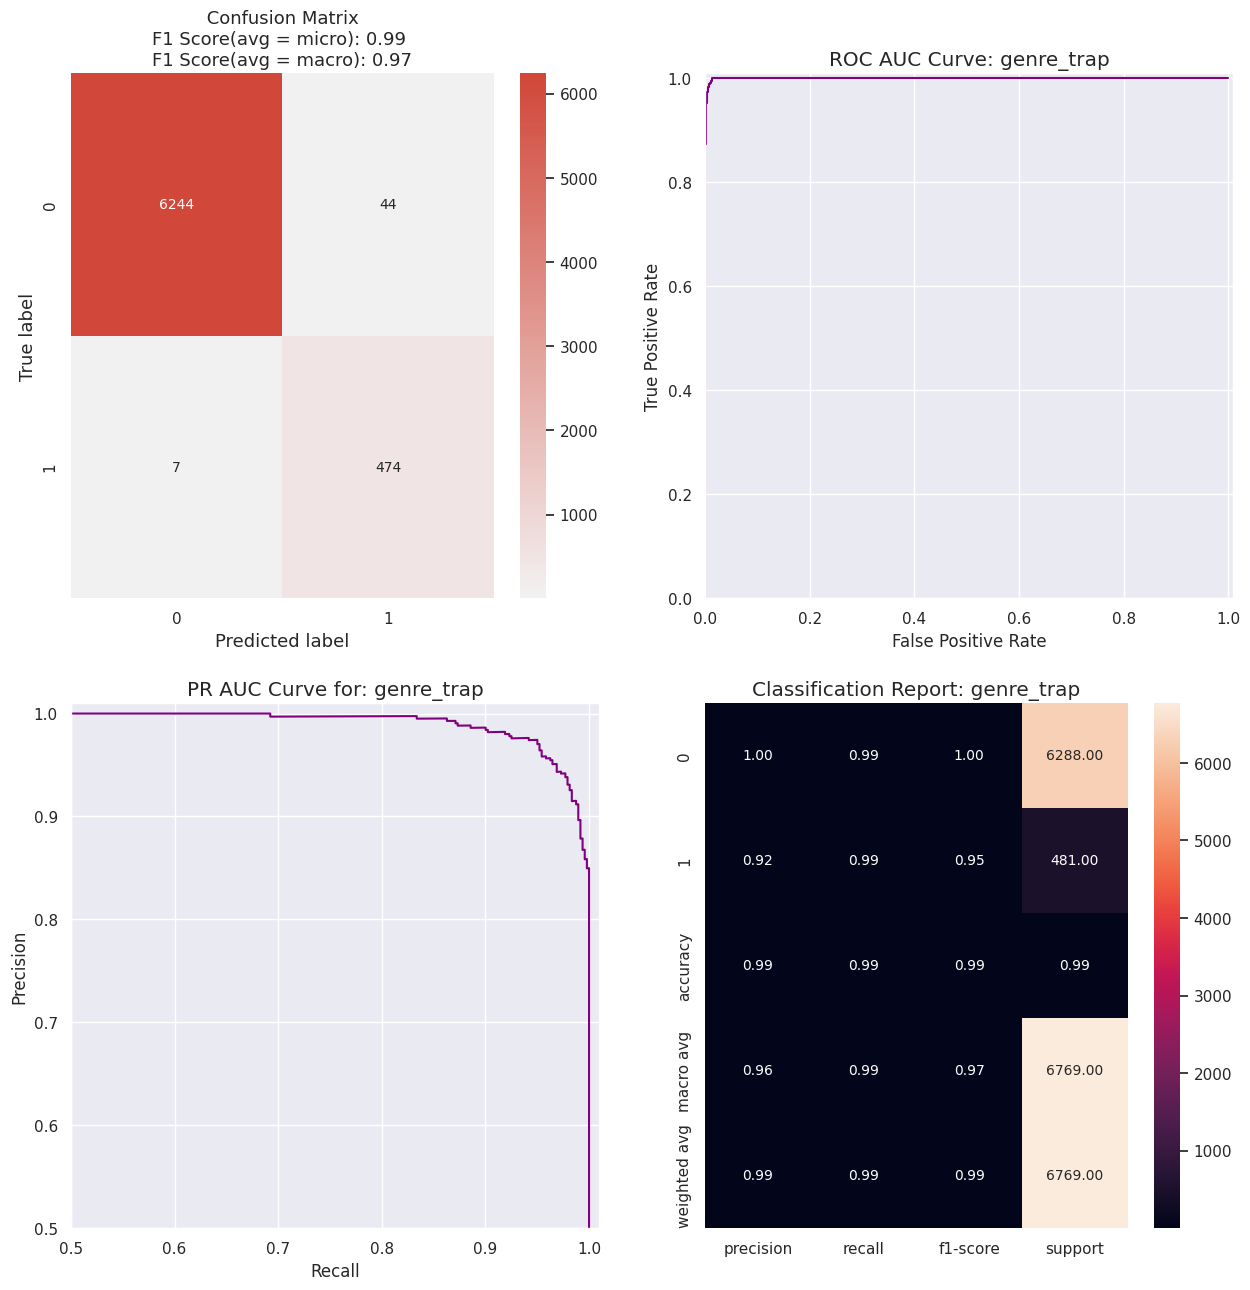

<Figure size 1500x1250 with 0 Axes>

In [7]:
# Initialize and train the AutoVIML model
model, features, trainm, testm = Auto_ViML(
    train=train_data,  # Combined training dataset
    test=X_test,        # Test dataset (X_test without target column)
    target=target_column,  # Target column name
    verbose=1  # Verbosity to display detailed output
)

Step 6: Evaluate the Model
Explanation: This cell evaluates the trained AutoVIML model’s performance using the test set.

In [10]:
from sklearn.metrics import accuracy_score

# Ensure the test set matches the feature set used by the trained model
X_test_modified = testm[features]  # Select only the features used during training

# Make predictions using the trained model
y_pred = model.predict(X_test_modified)

# Evaluate the model's performance
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

Model Accuracy: 0.99


#Conclusion
In this Colab, we embarked on a complete end-to-end AutoML workflow using the AutoVIML library. Here is a summary of the steps we covered:

Data Loading and Preprocessing:

We started with a preprocessed dataset containing various musical features, such as danceability, tempo, loudness, and genre.
After ensuring the dataset was clean and structured, we split it into training and testing datasets.
Model Building with AutoVIML:

We utilized AutoVIML to automatically handle feature selection, hyperparameter tuning, and model training.
AutoVIML also performed ensemble modeling by integrating predictions from multiple models to enhance performance.
Prediction and Evaluation:

After training, we used the trained model to predict on the test set.
We ensured the test data's feature space matched the model’s expectations to avoid errors during prediction.
The model achieved an impressive accuracy of 99%, indicating excellent predictive performance on the dataset.
Key Benefits of AutoVIML:

AutoVIML streamlined the entire machine learning workflow by automating feature engineering, model selection, and hyperparameter tuning.
Its built-in ensemble learning capabilities enhanced the model’s robustness and performance.